<a href="https://colab.research.google.com/github/nedokormysh/GB_Libraries_python_for_DS_2/blob/main/Libraries_Python_DS_2_hw_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Вопрос 1.



**Приведите по 2 примера, когда лучше максимизировать Precision, а когда Recall.**


**Точность** — вероятность того, что объект, случайно выбранный из пула отнесённых к "основному" классу (т.е. из пула извлеченных нашей моделью), является релевантным.

Для максимализации precision нужно уменьшить количество ложно-положительных решений.

<center>$ precision =  \frac{TP}{TP \: + \: FP} $</center>

***Примеры для Precision:*** 

*   Модель предсказывающая поведение цены. Например, хотим получить дни с ростом цены на какую-то величину. Можем пропустить какие-то дни, но желательно, получать более точные результаты. 
*   Модель для поиска друзей в социальных сетях. Если мы часто будем отправлять неверные предположения, то это может вызвать отток пользоывателей.
*   Модель для поиска новых месторождений полезных ископаемых.
*   Модель разблокировки телефона по отпечатку пальца.
---
**Полнота** — это предполагаемая вероятность того, что объект, случайно выбранный из пула релевантных объектов, будет извлечен, То есть, полнота показывает сколько образцов из всех положительных примеров были классифицированы правильно. Чем выше значение полноты, тем
меньше положительных примеров пропущено в классификации.

Для максимализации полносты следует уменьшить количество ложно-отрицательных решений.

<center> $recall =  \frac{TP}{TP \: + \: FN}$</center>

***Примеры для Recall:*** 



*   Модель для поиска новых сотрудников в фирму.
*   Модель для поиска ядов.
*   Модель для первоначальной диагностики кариеса на снимках. Или диагностики патологий на рентгене.
*   Модель поиска мошеннических операций в банках.





Максимизация той или иной метрики сильно зависит от условий. Например, рассмотрим вызовы скорой помощи при симптомах ОРВИ для выявления случаев гриппа. Если у нас есть большое количество ресурсов, то можно высылать врача в каждом случае, иными словами максимизировать recall, но если ресурсы ограничены, то следует отмечать более точно выявлять случаи гриппа, т.е. максимализировать precision.

Также возможно задача максимализировать эти метрики не будет отвечать других критериям другим задачам. Например, возможно точный поиск друзей в соц.сетях может уменьшить время пребывания человека в соц. сети.

# Вопрос 2.

**Почему мы используем F-меру, почему, например, нельзя просто взять среднее от Precision и Recall?** 


Можем создать такую модель, которая не будет допускать ошибок в определении объектов необходимого класса, но нам интересно не только как хорошо нам модели удаётся это делать, не переплачивая ложными срабатываниями, но и насколько нам получается найти все объекты класса.


Т.е. для одновременной оптимизации и precision и recall используется F-мера.

*  Точность и полнота имеют одинаковые значения в числителе и разные знаменатели. Имеет смысл усреднять только их обратные величины, т.е. гармоническое среднее.
*  Среднее гармоническое двух чисел имеет тенденцию к наименьшему числу.  




Возможно рассчитать F-меру придав различный вес точности и полноте. F-мера достигает максимума при полноте и точности, равными единице, и близка к нулю, если один из аргументов близок к нулю.

<center>$\LARGE F_{\beta} = (1+ \beta^2) \cdot \frac{precision \: \cdot \: recall}{(\beta^2 \cdot precision) \: + \: recall}$<center>

Если рассмотрим пример, где

$precision: 1.0$

$recall: 0.1$

Это даст нам результат:

F-мера: $0.18$

Арифметическое среднее: $0.55$

In [ ]:
def F_score(b, precision, recall):
  F = (1 + b**2) * (precision * recall) / (((b ** 2) * precision) + recall)
  return F

precision = 1
recall = 0.1

F_score(1, 1, 0.1)

0.18181818181818182

Тем самым арифметическое среднее будет подвержено сильному влиянию большего числа, что может привести к ошибочным выводам.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
precision = np.arange(0, 1, 0.01)
recall = np.arange(1, 0, -0.01)
# precision = [0.01, 0.99, 0.01]
# recall = [0.01, 0.99, 0.01]

Также можем рассмотреть пример, где precision будет изменяться от 0 до 1, а recall от 1 до 0.

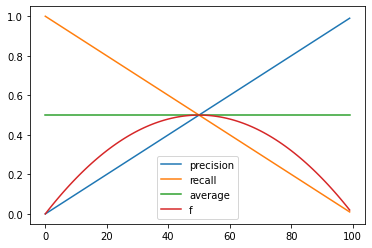

In [ ]:
def plt_f(b=1):    
    plt.plot(precision, label='precision')
    plt.plot(recall, label='recall')
    plt.plot((precision + recall) / 2, label='average')
    plt.plot(list(F_score(b, precision, recall)), label='f')
    plt.legend()

plt_f()

Гармоническое среднее взвешенно относительно минимального, тем самым минимизируется влияние больших выбросов и максимизируется влияние малых. 